### Performace evaluation of Time series model

- It is important to evaluate forecast accuracy.
- The accuracy of forecasts can only be determined by considering how well a model performs on new data that were not used when fitting the model.
- When choosing models, it is common practice to separate the available data into two portions, training and test data.
- The training data is used to estimate any parameters of a forecasting method and the test data is used to evaluate its accuracy. 

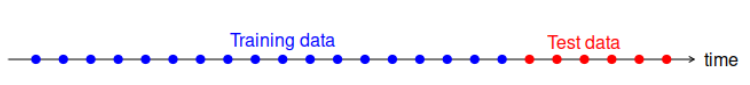

In [6]:
# The size of the test set is typically about 20% of the total sample

In [8]:
import numpy as np
import pandas as pd

In [9]:
#read data from file
df = pd.read_csv(r'./data/airline-traffic.csv', header=None)

#rename column headers
df.columns  =['Month', 'Passengers']

# make month column as datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Change month column as index
df.set_index('Month', inplace=True)

# impute missing values by linear interpolate 
df.Passengers.interpolate(method='linear', inplace=True)

# change datatype of passengers as int
df['Passengers'] = df['Passengers'].astype('int')

In [10]:
### Split data into train , test
train =  df[0:120]
test  =  df[120:]

### Cross Validation

- A more sophisticated version of training/test sets creation is a time series cross-validation. 
- In this procedure, there are a series of test sets, each consisting of a single observation. 
- The corresponding training set consists only of observations that occurred prior to the observation that forms the test set. 
- Thus, no future observations can be used in constructing the forecast.

#### One-Step cross validation

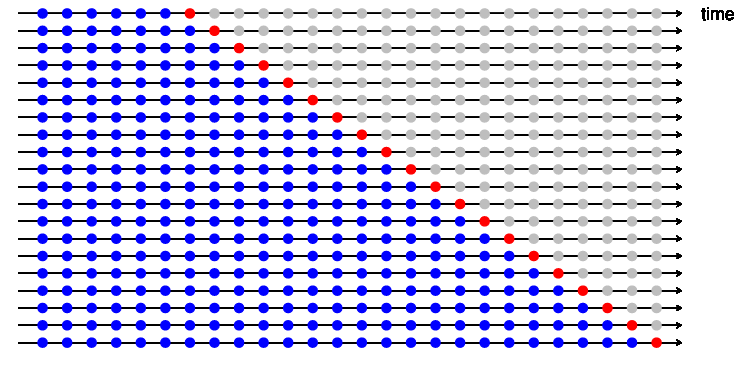

In [12]:
# One-Step Cross Validation

The above diagram illustrates the series of training and test sets, where the blue observations form the training sets, and the red observations form the test sets.

- The forecast accuracy is computed by averaging over the test sets. 
- This procedure is sometimes known as **“evaluation on a rolling forecasting origin”** because the “origin” at which the forecast is based rolls forward in time.

#### Multi-step forecasts 
With time series forecasting, one-step forecasts may not be as relevant as multi-step forecasts. <br>
In this case, the cross-validation procedure based on a rolling forecasting origin can be modified to allow multi-step errors to be used. <br>
Suppose that we are interested in models that produce good 4 -step-ahead forecasts. Then the corresponding diagram is shown below.

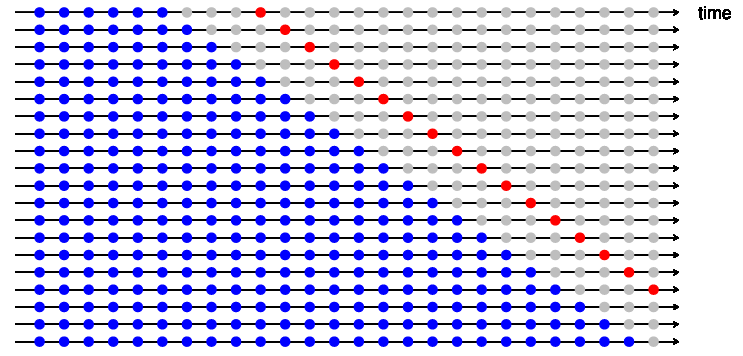

In [13]:
# multistep cross validation for 4 steps ahead 

This is the same as one-step validation, the only difference being that you do not consider a few points to the immediate right of the last training datapoint but rather skip a few of these points to make forecasts well into the future.